In [1]:
import os,sys,glob
import numpy as np
import pandas as pd
import osfclient as osf
from osfclient import cli
import h5py
import matplotlib.pyplot as plt
import sync

In [2]:
local_storage = '/Users/danieljdenman/data/clamp/'

In [3]:
animal_paths = glob.glob(local_storage+'*')

In [78]:
glob.glob(animal_paths[2]+'/2019*')

['/Users/danieljdenman/data/clamp/412787/20190104_a',
 '/Users/danieljdenman/data/clamp/412787/20190128',
 '/Users/danieljdenman/data/clamp/412787/20190117',
 '/Users/danieljdenman/data/clamp/412787/20190129',
 '/Users/danieljdenman/data/clamp/412787/20190116',
 '/Users/danieljdenman/data/clamp/412787/20190118',
 '/Users/danieljdenman/data/clamp/412787/20190130',
 '/Users/danieljdenman/data/clamp/412787/20190131',
 '/Users/danieljdenman/data/clamp/412787/201901114_m',
 '/Users/danieljdenman/data/clamp/412787/20190201',
 '/Users/danieljdenman/data/clamp/412787/20190125',
 '/Users/danieljdenman/data/clamp/412787/20190122',
 '/Users/danieljdenman/data/clamp/412787/20190115',
 '/Users/danieljdenman/data/clamp/412787/20190123',
 '/Users/danieljdenman/data/clamp/412787/20190124']

In [246]:
date = '20190130'

In [247]:
glob.glob('/Users/danieljdenman/data/clamp/412787/'+date+'/'+'*')

['/Users/danieljdenman/data/clamp/412787/20190130/rewardData.npy',
 '/Users/danieljdenman/data/clamp/412787/20190130/t.npy',
 '/Users/danieljdenman/data/clamp/412787/20190130/x.npy',
 '/Users/danieljdenman/data/clamp/412787/20190130/trialData.npy',
 '/Users/danieljdenman/data/clamp/412787/20190130/licks.npy']

In [248]:
# h5 = h5py.File(glob.glob('/Users/danieljdenman/data/clamp/412787/'+date+'/'+'*h5')[0])
x=np.load(glob.glob('/Users/danieljdenman/data/clamp/412787/'+date+'/'+'x*')[0])
t=np.load(glob.glob('/Users/danieljdenman/data/clamp/412787/'+date+'/'+'t*')[0])
v = (np.diff(x)*-1)/np.diff(t)
rewardData=np.load(glob.glob('/Users/danieljdenman/data/clamp/412787/'+date+'/'+'rew*')[0])
licks=np.load(glob.glob('/Users/danieljdenman/data/clamp/412787/'+date+'/'+'lick*')[0])
trialData=np.load(glob.glob('/Users/danieljdenman/data/clamp/412787/'+date+'/'+'tria*')[0])

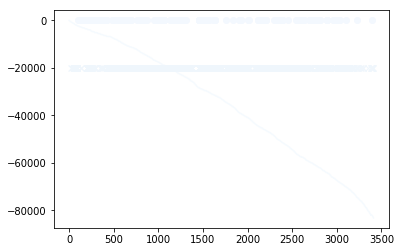

In [241]:
plt.plot(t,x)
plt.plot(rewardData,np.zeros(len(rewardData)),'o')
plt.plot(trialData,np.ones(len(trialData))*-10000,'x')
plt.plot(licks,np.ones(len(licks))*-20000,'x')

(-150, 100)

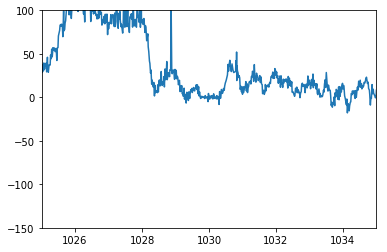

In [113]:
plt.plot(t[:-1],v)
plt.xlim(1025,1035)
plt.ylim(-150,100)

In [257]:
h = sync.Dataset(glob.glob('/Users/danieljdenman/data/clamp/412787/20190129/'+'*h5')[0])

In [272]:
for i in range(10): print(h.get_events_by_line(i).shape[0])

0
1
18
48
4
0
62
22
0
0


In [273]:
selected_rewards.shape

(99,)

In [37]:
np.diff(t[1:100])

array([0.00878444, 0.0008715 , 0.00073506, 0.00074032, 0.01683964,
       0.01684822, 0.01632847, 0.01683521, 0.01649037, 0.01664563,
       0.01667497, 0.01665504, 0.01721381, 0.01619231, 0.03821361,
       0.01375909, 0.00199207, 0.01307883, 0.01663346, 0.01689914,
       0.01644665, 0.01625071, 0.01668936, 0.01691602, 0.04031002,
       0.02612362, 0.02542039, 0.01282615, 0.00167076, 0.00079069,
       0.0092588 , 0.01675412, 0.02024648, 0.01312837, 0.01655929,
       0.03499607, 0.08579672, 0.0284251 , 0.01459018, 0.0016572 ,
       0.00120277, 0.00130047, 0.01538613, 0.01678816, 0.02057775,
       0.01264931, 0.03672191, 0.02316457, 0.00151191, 0.00521626,
       0.01662349, 0.03201239, 0.00924967, 0.00885889, 0.01652275,
       0.0166567 , 0.02367241, 0.01003149, 0.02050773, 0.01266923,
       0.01641731, 0.02291383, 0.01086425, 0.03561268, 0.01419968,
       0.00148312, 0.01493723, 0.01666916, 0.02333117, 0.01093288,
       0.01994399, 0.01265208, 0.01663484, 0.02269492, 0.01056

In [236]:
selected_rewards = rewardData[np.argwhere(np.diff(rewardData) > 2).flatten()]

In [255]:
approaches = []
ts=[]
lickset = []
rlickset=[]
treward = []
for i,rewardTime in enumerate(selected_rewards):
#     reward_t = t[np.argwhere(t>rewardTime)[0][0]]
    treward.extend([t[np.argwhere(t>rewardTime)[0][0]-1]])
    approach = v[np.argwhere(t>rewardTime-10.)[0][0]:np.argwhere(t>rewardTime+6.)[0][0]]
    approach_t = t[np.argwhere(t>rewardTime-10.)[0][0]:np.argwhere(t>rewardTime+6.)[0][0]]
    licks_trial = licks[np.argwhere(licks>rewardTime-10.)[0][0]:np.argwhere(licks>rewardTime+6.)[0][0]]
#     rlicks_trial= licks[np.argwhere(licks<rewardTime)[-1][0]]
    approaches.append(approach)
    ts.append(approach_t)
    lickset.append(licks_trial)
    rlickset.append(rlicks_trial)

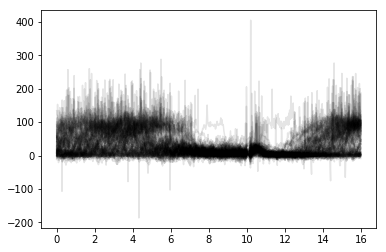

In [208]:
for i,a in enumerate(approaches): 
    plt.plot(ts[i]-ts[i][0],a,color='k',alpha=0.1)

In [180]:
from scipy.ndimage.filters import gaussian_filter1d

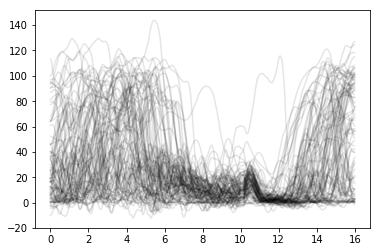

In [254]:
for i,a in enumerate(approaches): 
    plt.plot(ts[i]-ts[i][0],gaussian_filter1d(a,8),color='k',alpha=0.1)

In [233]:
import seaborn as sns

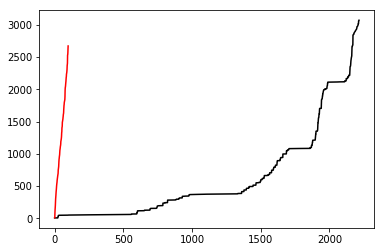

In [278]:
plt.plot(licks,'k')
plt.plot(selected_rewards,'r')

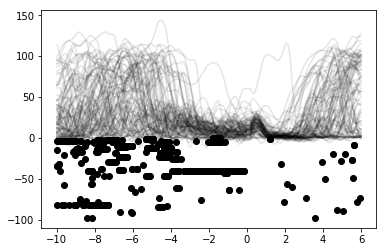

In [256]:
for i,a in enumerate(approaches): 
    plt.plot(ts[i]-treward[i],gaussian_filter1d(a,8),color='k',alpha=0.1)
    plt.plot(lickset[i]-treward[i],np.ones(len(lickset[i]))*i*-1,'o',color='k')
#     plt.plot(rlickset[i]-treward[i],i*-1,'o',color='r')

    

In [323]:
mouse = '412787'
date = '20190129'

In [334]:
h5 = h5py.File(glob.glob('/Users/danieljdenman/data/clamp/412787/'+date+'/'+'*h5')[0])
x=np.load(glob.glob('/Users/danieljdenman/data/clamp/'+mouse+'/'+date+'/'+'x*')[0])
t=np.load(glob.glob('/Users/danieljdenman/data/clamp/'+mouse+'/'+date+'/'+'t*')[0])
v = (np.diff(x)*-1)/np.diff(t)
rewardData=np.load(glob.glob('/Users/danieljdenman/data/clamp/'+mouse+'/'+date+'/'+'rew*')[0])
licks=np.load(glob.glob('/Users/danieljdenman/data/clamp/'+mouse+'/'+date+'/'+'lick*')[0])
trialData=np.load(glob.glob('/Users/danieljdenman/data/clamp/'+mouse+'/'+date+'/'+'tria*')[0])
selected_rewards = rewardData[np.argwhere(np.diff(rewardData) > 2).flatten()]

In [336]:
list(h5.keys())

['analog_data', 'analog_meta', 'data', 'meta']

In [332]:
approaches = []
ts=[]
lickset = []
rlickset=[]
treward = []
for i,rewardTime in enumerate(selected_rewards):
#     reward_t = t[np.argwhere(t>rewardTime)[0][0]]
    treward.extend([t[np.argwhere(t>rewardTime)[0][0]-1]])
    approach = v[np.argwhere(t>rewardTime-10.)[0][0]:np.argwhere(t>rewardTime+6.)[0][0]]
    approach_t = t[np.argwhere(t>rewardTime-10.)[0][0]:np.argwhere(t>rewardTime+6.)[0][0]]
    licks_trial = licks[np.argwhere(licks>rewardTime-10.)[0][0]:np.argwhere(licks>rewardTime+6)[0][0]]
#     rlicks_trial= licks[np.argwhere(licks<rewardTime)[-1][0]]
    approaches.append(approach)
    ts.append(approach_t)
    lickset.append(licks_trial)
    rlickset.append(rlicks_trial)

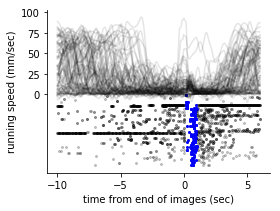

In [392]:
plt.figure(figsize=(4,3))
for i,a in enumerate(approaches): 
    plt.plot(ts[i]-treward[i],gaussian_filter1d(a,8),color='k',alpha=0.1)
    plt.plot(lickset[i]-treward[i],np.ones(len(lickset[i]))*i*-1,'o',ms=2,color='k',alpha=0.2)
    tl = lickset[i]-treward[i]
    rewarded_tl=tl[(tl > 0) & (tl < 1)]
    plt.plot(rewarded_tl,np.ones(len(rewarded_tl))*i*-1,'o',ms=2,color='b',alpha=1)
# plt.legend()
#     plt.plot(rlickset[i]-treward[i],i*-1,'o',color='r')
cleanAxes(plt.gca(),bottomLabels=True,leftLabels=True)
plt.xlabel('time from end of images (sec)')
plt.ylabel('running speed (mm/sec)')
plt.yticks([0,25,50,75,100])
plt.gcf().savefig('/Users/danieljdenman/Dropbox/allenTransfer/'+mouse+'_'+date+'_summary.eps',format='eps')
plt.gcf().savefig('/Users/danieljdenman/Dropbox/allenTransfer/'+mouse+'_'+date+'_summary.png',format='png',dpi=600)

In [379]:
rts = []
for i,a in enumerate(approaches): 
    tl = lickset[i]-treward[i]
    rewarded_tl=tl[(tl > 0) & (tl < 1)]
    try:rts.extend([rewarded_tl[0]])
    except:pass

(array([ 7.,  3.,  1.,  0., 10., 11.,  7., 14.,  4.,  3.]),
 array([0.15064899, 0.2314829 , 0.31231682, 0.39315073, 0.47398465,
        0.55481856, 0.63565247, 0.71648639, 0.7973203 , 0.87815422,
        0.95898813]),
 <a list of 10 Patch objects>)

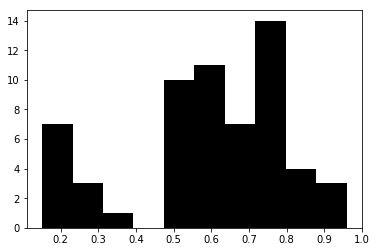

In [383]:
plt.hist(rts,color='k')

In [339]:
from braintv_ephys_dev.workstation.danield.generalephys import cleanAxes

In [371]:
tl = lickset[i]-treward[i]
tl[(tl > 0) & (tl < 1)]

array([0.72308127])